In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#!cp /content/drive/My\ Drive/final_datasets.zip /content && unzip final_datasets.zip

In [0]:
import pandas as pd
import numpy as np

In [0]:
traffic_flow = pd.read_csv("final_dataset.csv")
punctual_incidents = pd.read_csv("out_punctual_incidents.csv")
closed_roads = pd.read_csv("out_closed_roads.csv")

In [57]:
traffic_flow.head()

,Day of year,Hour,week_or_not,road_num,functional_road_class_desc,time_rate,rain,temperature,atmospheric_pressure,humidity,wind_speed,clouds,current_luminosity,atmosphere
0,15.0,19.0,1.0,1.0,3.0,0.999993,0.0,8.0,1019.0,93.0,1.0,12.0,0.0,0.0
1,15.0,19.0,1.0,2.0,3.0,0.292290,0.0,8.0,1019.0,93.0,1.0,12.0,0.0,0.0
2,15.0,19.0,1.0,3.0,1.0,0.793552,0.0,8.0,1019.0,93.0,1.0,12.0,0.0,0.0
3,15.0,19.0,1.0,4.0,2.0,0.545009,0.0,8.0,1019.0,93.0,1.0,12.0,0.0,0.0
4,15.0,20.0,1.0,1.0,3.0,0.999993,0.0,9.0,1020.0,93.0,1.0,20.0,0.0,0.0


In [0]:
x_axis = []
previous_name = ""

for i in traffic_flow.iterrows():
  if(not pd.isnull(i[1][5])):
    
    name = str(i[1][0]) + " ," + str(i[1][1]) 

    if(previous_name != name):
      x_axis.append(name)
    
    previous_name = name

In [59]:
traffic_flow.isnull().sum()

Day of year                      0
Hour                             0
week_or_not                      0
road_num                         0
functional_road_class_desc       0
time_rate                     6360
rain                          6200
temperature                   6200
atmospheric_pressure          6200
humidity                      6200
wind_speed                    6200
clouds                        6200
current_luminosity            6132
atmosphere                    6200
dtype: int64

In [60]:
punctual_incidents.head()

,Day of year,Hour,Minute,magnitude_of_delay_desc,length_in_meters,delay_in_seconds,AvenidaCentral,AvenidaLiberdade,RuaDeCaires,Bosch,week_or_not
0,15,19,0.083333,2,615,111,2871.589353,2871.589353,1767.444236,1267.330940,1
1,15,19,0.083333,2,1008,210,2571.299699,2161.513827,1486.684810,373.585408,1
2,15,19,0.083333,2,615,184,965.778946,1027.212214,1758.926643,3206.313071,1
3,15,19,0.083333,3,322,232,726.759470,855.618311,1665.794200,3053.127261,1
4,15,19,0.083333,3,208,235,2069.868805,2069.868805,1597.478316,2790.436927,1


In [61]:
punctual_incidents.isnull().sum()

Day of year                0
Hour                       0
Minute                     0
magnitude_of_delay_desc    0
length_in_meters           0
delay_in_seconds           0
AvenidaCentral             0
AvenidaLiberdade           0
RuaDeCaires                0
Bosch                      0
week_or_not                0
dtype: int64

In [62]:
closed_roads.head()

,Day of year,Hour,length_in_meters,AvenidaCentral,AvenidaLiberdade,RuaDeCaires,Bosch,week_or_not
0,15,19,88,1582.434953,1206.42697,2467.183987,2947.217154,1
1,15,20,88,1582.434953,1206.42697,2467.183987,2947.217154,1
2,15,21,88,1582.434953,1206.42697,2467.183987,2947.217154,1
3,15,22,88,1582.434953,1206.42697,2467.183987,2947.217154,1
4,15,23,88,1582.434953,1206.42697,2467.183987,2947.217154,1


In [63]:
closed_roads.isnull().sum()

Day of year         0
Hour                0
length_in_meters    0
AvenidaCentral      0
AvenidaLiberdade    0
RuaDeCaires         0
Bosch               0
week_or_not         0
dtype: int64

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler_flow = MinMaxScaler()
traffic_flow_normalized = pd.DataFrame(scaler_flow.fit_transform(traffic_flow.iloc[:,2:]), columns=traffic_flow.columns[2:] )
traffic_flow_normalized['Day of year'] = traffic_flow.iloc[:,0]
traffic_flow_normalized['Hour'] = traffic_flow.iloc[:,1]

punctual_incidents_normalized = pd.DataFrame(scaler_flow.fit_transform(punctual_incidents.iloc[:,3:]),columns=punctual_incidents.columns[3:])
punctual_incidents_normalized['Day of year'] = punctual_incidents.iloc[:,0]
punctual_incidents_normalized['Hour'] = punctual_incidents.iloc[:,1]
punctual_incidents_normalized['Minute'] = punctual_incidents.iloc[:,2]

closed_roads_normalized = pd.DataFrame(scaler_flow.fit_transform(closed_roads.iloc[:,2:]),columns=closed_roads.columns[2:])
closed_roads_normalized['Day of year'] = closed_roads.iloc[:,0]
closed_roads_normalized['Hour'] = closed_roads.iloc[:,1]

In [65]:
traffic_flow.describe()

,Day of year,Hour,week_or_not,road_num,functional_road_class_desc,time_rate,rain,temperature,atmospheric_pressure,humidity,wind_speed,clouds,current_luminosity,atmosphere
count,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,27260.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27488.000000,27420.000000
mean,190.395598,11.505651,0.714456,2.500000,2.250000,0.874601,0.113056,15.113640,1017.869584,81.825237,3.048869,35.311889,0.977445,0.302553
std,101.097937,6.924192,0.451680,1.118051,0.829169,0.179114,0.440381,5.508167,5.952428,17.177387,2.176722,34.915653,0.978356,1.008697
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,990.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,103.000000,6.000000,0.000000,1.750000,1.750000,0.767359,0.000000,11.000000,1015.000000,72.000000,1.000000,0.000000,0.000000,0.000000
50%,190.000000,12.000000,1.000000,2.500000,2.500000,0.999996,0.000000,15.000000,1018.000000,87.000000,3.000000,20.000000,1.000000,0.000000
75%,278.000000,18.000000,1.000000,3.250000,3.000000,0.999999,0.000000,18.000000,1021.000000,93.000000,4.000000,75.000000,2.000000,0.000000
max,365.000000,23.000000,1.000000,4.000000,3.000000,1.000000,3.000000,34.000000,1033.000000,100.000000,14.000000,100.000000,2.000000,5.000000


In [0]:
traffic_flow_normalized_masked=traffic_flow_normalized.fillna(value=-1)

In [67]:
traffic_flow_normalized_masked.describe()

,week_or_not,road_num,functional_road_class_desc,time_rate,rain,temperature,atmospheric_pressure,humidity,wind_speed,clouds,current_luminosity,atmosphere,Day of year,Hour
count,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000
mean,0.714456,0.500000,0.625000,0.519977,-0.153678,0.164401,0.344192,0.448171,-0.006799,0.103585,0.217192,-0.135062,190.395598,11.505651
std,0.451680,0.372684,0.414584,0.751698,0.423715,0.573848,0.651300,0.714769,0.492718,0.612224,0.725371,0.449841,101.097937,6.924192
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,15.000000,0.000000
25%,0.000000,0.250000,0.375000,0.544118,0.000000,0.212121,0.488372,0.419753,0.000000,0.000000,0.000000,0.000000,103.000000,6.000000
50%,1.000000,0.500000,0.750000,0.912298,0.000000,0.363636,0.627907,0.765432,0.142857,0.200000,0.000000,0.000000,190.000000,12.000000
75%,1.000000,0.750000,1.000000,0.999999,0.000000,0.484848,0.697674,0.913580,0.285714,0.750000,1.000000,0.000000,278.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,365.000000,23.000000


In [68]:
grouped_traffic_flow = traffic_flow_normalized_masked.groupby(['Day of year', 'Hour']).agg(lambda x: list(x))
grouped_traffic_flow.head()

week_or_not  ...            atmosphere
Day of year Hour                        ...                      
15.0        19.0  [1.0, 1.0, 1.0, 1.0]  ...  [0.0, 0.0, 0.0, 0.0]
            20.0  [1.0, 1.0, 1.0, 1.0]  ...  [0.0, 0.0, 0.0, 0.0]
            21.0  [1.0, 1.0, 1.0, 1.0]  ...  [0.0, 0.0, 0.0, 0.0]
            22.0  [1.0, 1.0, 1.0, 1.0]  ...  [0.0, 0.0, 0.0, 0.0]
            23.0  [1.0, 1.0, 1.0, 1.0]  ...  [0.0, 0.0, 0.0, 0.0]

[5 rows x 12 columns]

In [0]:
trafic_flow_reshaped = np.zeros((351,24,4,len(grouped_traffic_flow.columns)))
trafic_flow_reshaped.fill(-1)

In [0]:
#content -> todas as colunas sem hora e dia
#esta função cria um array temporal por dias e horas
for (day,hour),content in grouped_traffic_flow.iterrows():
    index_day = int(day - 15)

    #se tiver -1 vai para negativo
    index_hour = int(hour)

    for entrance in range(4):
        place_holder = []
        for i in range(len(grouped_traffic_flow.columns)):
            place_holder.append(content[i][entrance])
    
        trafic_flow_reshaped[index_day][index_hour][entrance] = np.array(place_holder)
        

In [71]:
counter = 0
for i in range(351):
  for j in range(24):
    if trafic_flow_reshaped[i][j][0][3] != -1:
      counter+=1
counter

6815

In [72]:
print(trafic_flow_reshaped.shape)
trafic_flow_reshaped[0][19]

(351, 24, 4, 12)


array([[1.        , 0.        , 1.        , 0.99999313, 0.        ,
        0.21212121, 0.6744186 , 0.91358025, 0.07142857, 0.12      ,
        0.        , 0.        ],
       [1.        , 0.33333333, 1.        , 0.29229009, 0.        ,
        0.21212121, 0.6744186 , 0.91358025, 0.07142857, 0.12      ,
        0.        , 0.        ],
       [1.        , 0.66666667, 0.        , 0.79355269, 0.        ,
        0.21212121, 0.6744186 , 0.91358025, 0.07142857, 0.12      ,
        0.        , 0.        ],
       [1.        , 1.        , 0.5       , 0.54500946, 0.        ,
        0.21212121, 0.6744186 , 0.91358025, 0.07142857, 0.12      ,
        0.        , 0.        ]])

In [73]:
grouped_punctual_incidents = punctual_incidents_normalized.groupby(['Day of year', 'Hour']).agg(lambda x: list(x))
grouped_punctual_incidents.head()

magnitude_of_delay_desc  ...                                             Minute
Day of year Hour                                                     ...                                                   
15          19    [0.5, 0.5, 0.5, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...  ...  [0.08333333333333333, 0.08333333333333333, 0.0...
16          8     [1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, ...  ...  [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, ...
            9     [1.0, 0.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, ...  ...  [0.06666666666666668, 0.06666666666666668, 0.0...
            10                                                [0.0]  ...                              [0.06666666666666668]
            11                                                [1.0]  ...                               [0.7333333333333333]

[5 rows x 9 columns]

In [0]:
punctual_incidents_reshaped = np.zeros((351,24,223,len(grouped_punctual_incidents.columns)))
punctual_incidents_reshaped.fill(-1)

In [0]:
for (day,hour),content in grouped_punctual_incidents.iterrows():
    index_day = int(day - 15)
    index_hour = int(hour)
    
    for entrance in range(len(content[0])):
        place_holder = []
        for i in range(len(grouped_punctual_incidents.columns)):
            place_holder.append(content[i][entrance])
    
        punctual_incidents_reshaped[index_day][index_hour][entrance] = np.array(place_holder)
        

In [76]:
punctual_incidents_reshaped[0][18]

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [77]:
grouped_closed_roads = closed_roads_normalized.groupby(['Day of year', 'Hour']).agg(lambda x: list(x))
grouped_closed_roads.head()

length_in_meters  ... week_or_not
Day of year Hour                         ...            
15          19    [0.03626306084818685]  ...       [1.0]
            20    [0.03626306084818685]  ...       [1.0]
            21    [0.03626306084818685]  ...       [1.0]
            22    [0.03626306084818685]  ...       [1.0]
            23    [0.03626306084818685]  ...       [1.0]

[5 rows x 6 columns]

In [0]:
closed_roads_reshaped = np.zeros((351,24,7,len(grouped_closed_roads.columns)))
closed_roads_reshaped.fill(-1)

In [0]:
for (day,hour),content in grouped_closed_roads.iterrows():
    index_day = int(day - 15)
    index_hour = int(hour)

    
    for entrance in range(len(content[0])):
        place_holder = []
        for i in range(len(grouped_closed_roads.columns)):
            place_holder.append(content[i][entrance])
    
        closed_roads_reshaped[index_day][index_hour][entrance] = np.array(place_holder)
        

In [80]:
closed_roads_reshaped[0][18]

array([[-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.]])

In [81]:
trafic_flow_reshaped.shape

(351, 24, 4, 12)

In [82]:
punctual_incidents_reshaped.shape

(351, 24, 223, 9)

In [83]:
closed_roads_reshaped.shape

(351, 24, 7, 6)

In [84]:
trafic_flow_reshaped[0][18]

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [85]:
trafic_flow_reshaped[0][18][:,3]

array([-1., -1., -1., -1.])

In [0]:
background_hours = 3

In [0]:
def to_supervised(dataset, dataset_index, background_hours):
  labels = []
  timesteps = []

  for day in range(351):
    for hour in range(24):
      if (day == 350 and hour > (23-background_hours)):
        break
      else:
          tbf = []
          for context in range(background_hours):
              current_jump = hour+context
              time_frame = np.repeat( [[ hour/24 ]] , dataset.shape[2], axis=0) 
              if current_jump > 23 :
                  adjusted_jump = current_jump - 23
                  tbf.append( np.hstack((time_frame,dataset[day+1][adjusted_jump-1])) )
              else:
                tbf.append( np.hstack(( time_frame, dataset[day][current_jump])))

          timesteps.append(tbf)
          if dataset_index == 1:
            label_jump = hour + background_hours

            if label_jump > 23 :
              adjusted_label_jump = label_jump - 23
              labels.append(dataset[day+1][adjusted_label_jump-1][:,3])
            else :
              labels.append(dataset[day][hour+background_hours][:,3])

  if dataset_index == 1:
    return timesteps, labels

  else:
    return timesteps
          

In [88]:
traffic_flow_timesteps, labels = to_supervised(trafic_flow_reshaped, 1, background_hours)
traffic_flow_model_data = np.array(traffic_flow_timesteps)
labels = np.array(labels)
print(traffic_flow_model_data.shape)
print(labels.shape)

(8421, 3, 4, 13)
(8421, 4)


In [89]:
punctual_incidents_timesteps = to_supervised(punctual_incidents_reshaped, 2, background_hours)
punctual_incidents_model_data = np.array(punctual_incidents_timesteps)
print(punctual_incidents_model_data.shape)

(8421, 3, 223, 10)


In [90]:
closed_roads_timesteps = to_supervised(closed_roads_reshaped, 2, background_hours)
closed_roads_model_data = np.array(closed_roads_timesteps)
print(closed_roads_model_data.shape)

(8421, 3, 7, 7)


In [0]:
def time_shift(traffic_flow_model_data,labels,punctual_incidents_model_data,closed_roads_model_data):
  indexes = []
  for i in range(closed_roads_model_data.shape[0]):
      if -1 in labels[i]:
        indexes.append(i)

  corrected_traffic_flow_model_data = np.delete(traffic_flow_model_data,indexes,axis=0)
  corrected_labels = np.delete(labels,indexes,axis=0)
  corrected_punctual_incidents_model_data = np.delete(punctual_incidents_model_data,indexes,axis=0)
  corrected_closed_roads_model_data = np.delete(closed_roads_model_data,indexes,axis=0)

  return corrected_traffic_flow_model_data,corrected_labels,corrected_punctual_incidents_model_data,corrected_closed_roads_model_data

corrected_traffic_flow_model_data,corrected_labels,corrected_punctual_incidents_model_data,corrected_closed_roads_model_data = time_shift(traffic_flow_model_data,labels,punctual_incidents_model_data,closed_roads_model_data)

In [92]:
print('Taffic flow data shape: {}'.format(corrected_traffic_flow_model_data.shape))
print('Punctual incidents data shape: {}'.format(corrected_punctual_incidents_model_data.shape))
print('Closed roads data shape: {}'.format(corrected_closed_roads_model_data.shape))
print('Labels shape: {}'.format(corrected_labels.shape))

Taffic flow data shape: (6815, 3, 4, 13)
Punctual incidents data shape: (6815, 3, 223, 10)
Closed roads data shape: (6815, 3, 7, 7)
Labels shape: (6815, 4)


In [93]:
print('------------ Reshaping the datasets ------------')

print('------------ Train set ------------')
(x1,x2,x3,x4) = corrected_traffic_flow_model_data.shape
corrected_traffic_flow_model_data = corrected_traffic_flow_model_data.reshape(x1,x2,x3*x4)
print('Taffic flow data shape: {}'.format(corrected_traffic_flow_model_data.shape))

(x1,x2,x3,x4) = corrected_punctual_incidents_model_data.shape
corrected_punctual_incidents_model_data = corrected_punctual_incidents_model_data.reshape(x1,x2,x3*x4)
print('Punctual incidents data shape: {}'.format(corrected_punctual_incidents_model_data.shape))

(x1,x2,x3,x4) = corrected_closed_roads_model_data.shape
corrected_closed_roads_model_data = corrected_closed_roads_model_data.reshape(x1,x2,x3*x4)
print('Closed roads data shape: {}'.format(corrected_closed_roads_model_data.shape))

print('Labels shape: {}'.format(corrected_labels.shape))

------------ Reshaping the datasets ------------
------------ Train set ------------
Taffic flow data shape: (6815, 3, 52)
Punctual incidents data shape: (6815, 3, 2230)
Closed roads data shape: (6815, 3, 49)
Labels shape: (6815, 4)


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,LSTM,Masking,concatenate,Dense,Flatten,Reshape, Dropout
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

In [0]:
 def build_model(traffic_shape,punctual_shape,closed_shape,units_lstm,units_dense,dropout,recurrent_dropout):

  traffic_flow_input = Input(shape = traffic_shape)
  punctual_incidents_input = Input(shape = punctual_shape)
  closed_roads_input = Input(shape = closed_shape)

  mask1 = Masking(mask_value = -1)(traffic_flow_input)
  lstm1 = LSTM(units=units_lstm[0], dropout = dropout,recurrent_dropout=recurrent_dropout, return_sequences = True)(mask1)
  
  mask2 = Masking(mask_value = -1)(punctual_incidents_input)
  lstm2 = LSTM(units=units_lstm[1], dropout = dropout,recurrent_dropout=recurrent_dropout, return_sequences = True)(mask2)
  
  mask3 = Masking(mask_value = -1)(closed_roads_input)
  lstm3 = LSTM(units=units_lstm[2], dropout = dropout,recurrent_dropout=recurrent_dropout,return_sequences = True)(mask3)

  concat_result = concatenate( [lstm1,lstm2,lstm3],axis=1)
  lstm4 = LSTM(units = units_lstm[2],dropout = dropout,recurrent_dropout=recurrent_dropout,return_sequences = False)(concat_result)

  dense1 = Dense(units_dense,activation='relu')(lstm4)
  
  dense1 = Dropout(rate = dropout)(dense1)

  dense_output = Dense(4,activation='sigmoid')(dense1)

  model = Model(inputs=[traffic_flow_input,punctual_incidents_input,closed_roads_input], outputs = dense_output, name='traffic_flow_lstm')

  model.compile(optimizer = "adam", loss = MeanSquaredError(), metrics = [RootMeanSquaredError()])

  return model

#model = build_model(corrected_traffic_flow_model_data.shape[1:],corrected_punctual_incidents_model_data.shape[1:],corrected_closed_roads_model_data.shape[1:],units_lstm=[16,16,16],units_dense=32,dropout = 0.3,recurrent_dropout=0)
#model.summary()

In [0]:
#!pip install livelossplot
#from livelossplot import PlotLossesKeras

In [0]:
#custom backtest function
#We have two aproaches for backtesting in temporal series
#Sliding window or expanding window, i'm using expanding window

import numpy as np
from sklearn.model_selection import TimeSeriesSplit


def backtest_expanding(epochs,corrected_traffic_flow_model_data,corrected_labels,corrected_punctual_incidents_model_data,corrected_closed_roads_model_data):

    predictions = []
    true_values = []
    accuracy_test = []
    accuracy_train = []

    n_splits = 6
    tscv = TimeSeriesSplit(max_train_size=None, n_splits= n_splits)

    tmp = 1
    for train_index, test_index in tscv.split(corrected_traffic_flow_model_data):
      
      print("This is the " + str(tmp) + " model")

        
      x_train1 = corrected_traffic_flow_model_data[train_index]
      x_train2 = corrected_punctual_incidents_model_data[train_index]
      x_train3 = corrected_closed_roads_model_data[train_index]
      y_train = corrected_labels[train_index]

      x_test1 = corrected_traffic_flow_model_data[test_index]
      x_test2 = corrected_punctual_incidents_model_data[test_index]
      x_test3 = corrected_closed_roads_model_data[test_index]
      y_test = corrected_labels[test_index]
      
      model = build_model(corrected_traffic_flow_model_data.shape[1:],corrected_punctual_incidents_model_data.shape[1:],corrected_closed_roads_model_data.shape[1:],units_lstm=[126,126,126],units_dense=256,dropout = 0,recurrent_dropout=0)

    
      history = model.fit(
            x=[
              x_train1,
              x_train2,
              x_train3
              ],
          y =[y_train],
          epochs = epochs,
          shuffle = False,
          batch_size = 128,
          verbose = 0
      )

      #loss_train
      acc_train = history.history["root_mean_squared_error"][-1]

      acc_test = model.evaluate([x_test1,x_test2,x_test3],[y_test])[1]


      accuracy_train.append(acc_train)
      accuracy_test.append(acc_test)  

      tmp += 1

    return accuracy_train, accuracy_test, model


epochs = 100
#model = build_model(corrected_traffic_flow_model_data.shape[1:],corrected_punctual_incidents_model_data.shape[1:],corrected_closed_roads_model_data.shape[1:],units_lstm=[16,16,16],units_dense=32)
accuracy_train, accuracy_test, model = backtest_expanding(epochs,corrected_traffic_flow_model_data,corrected_labels,corrected_punctual_incidents_model_data,corrected_closed_roads_model_data)

This is the 1 model
31/31 [==============================] - 0s 9ms/step - loss: 0.0174 - root_mean_squared_error: 0.1318
This is the 2 model
31/31 [==============================] - 0s 10ms/step - loss: 0.0131 - root_mean_squared_error: 0.1146
This is the 3 model
31/31 [==============================] - 0s 9ms/step - loss: 0.0116 - root_mean_squared_error: 0.1077
This is the 4 model
31/31 [==============================] - 0s 10ms/step - loss: 0.0109 - root_mean_squared_error: 0.1042
This is the 5 model


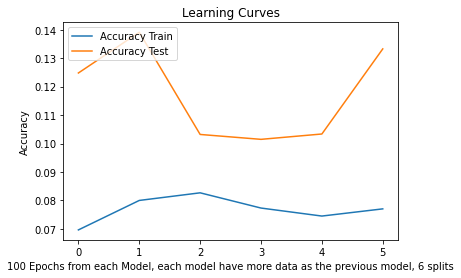

In [99]:
import matplotlib.pyplot as plt

def plot_learning_curves(accuracy_train,accuracy_test):
  plt.plot(accuracy_train)
  plt.plot(accuracy_test)

  plt.title("Learning Curves")
  plt.xlabel("100 Epochs from each Model, each model have more data as the previous model, 6 splits")
  plt.ylabel("Accuracy")
  plt.legend([
            'Accuracy Train',
            'Accuracy Test',
            ],loc = 'upper left')
  plt.show

plot_learning_curves(accuracy_train,accuracy_test)

In [0]:
import matplotlib.pyplot as plt

def make_plot(street_number,n_hour_to_predict,x_axis):

  plt.figure(figsize=(20,5))
  
  #número de horas que fazemos a previsão
  i = n_hour_to_predict - 1
  x_axis = np.asarray(x_axis)


  x_axis_train = x_axis[:len(x_axis) - i][-50:]
  y_train = corrected_labels[:len(corrected_labels)-i][:,street_number][-50:]


  y_axis_true_values = corrected_labels[:len(corrected_labels)][(-i-50):][:,street_number]
  
  y_axis_predictions = []
  x1_to_predict = corrected_traffic_flow_model_data[:len(corrected_traffic_flow_model_data)][-i:]
  x2_to_predict = corrected_punctual_incidents_model_data[:len(corrected_punctual_incidents_model_data)][-i:]
  x3_to_predict = corrected_closed_roads_model_data[:len(corrected_closed_roads_model_data)][-i:]

  for i in range(len(x1_to_predict)):
    x1 = x1_to_predict[i].reshape(1,3,52)
    x2 = x2_to_predict[i].reshape(1,3,2230)
    x3 = x3_to_predict[i].reshape(1,3,49)

    pre = model.predict([x1,x2,x3])[0][street_number]  
    y_axis_predictions.append(pre)
    
  
  y_axis_predictions = np.append(y_train,np.asarray(y_axis_predictions),axis=0)
 
  number = 51 + i

  
  
  plt.plot(x_axis[-number:],y_axis_predictions,'r') #predicted time ratio
  plt.plot(x_axis[-number:],y_axis_true_values,'b')#real time ratio
  plt.plot(x_axis_train,y_train,'k')#train data
  plt.xticks(rotation=90)

  plt.title("Time Ratio Traffic in Braga")
  plt.xlabel("Day and hour")
  plt.xticks(rotation=90)
  plt.ylabel("Time Ratio")
  plt.legend([
            'Predicted Time Ratio',
            'Real Time Ratio',
            'Train data'
            ],loc = 'upper left')
  
  plt.legend
  plt.show()
  

n_hour_to_predict = 20
make_plot(1,n_hour_to_predict,x_axis)

In [0]:
#def save_model(model_name, losses, epochs, batch_size, time_step, units_lstm, units_dense,stateless = True):
    import os
    import csv
    from matplotlib import pyplot as plt

    
    csv_file = model_name + ".csv"
    
    file_exists = os.path.isfile(csv_file)
    
    
    with open (csv_file, 'a') as csvfile:
        headers = ['Loss' , 'Units Lstm', 'Units Dense', 'Time Step','Epochs', 'Stateless', 'Batch']
        
        writer = csv.DictWriter(csvfile, delimiter=',', lineterminator='\n',fieldnames=headers)

        if not file_exists:
            writer.writeheader()  # file doesn't exist yet, write a header
                
        writer.writerow({'Loss': losses[-1],
                         'Units Lstm': units_lstm,
                         'Units Dense': units_dense,
                         'Time Step': time_step,
                         'Epochs': epochs,
                         'Stateless': stateless,
                         'Batch': batch_size
        })
                         
                         
#save_model("model",losses,epochs,0,5,[16,16,16],32)

In [0]:
def greedy_search():

  time_step = [1,2,3,4,5]

  epochs = 10
  batch_size = 0
  stateless = True

  units_lstm = [
                [32,32,32],
                [64,64,64],
                [128,128,128],
                [256,256,256],
                [512,512,512]
  ]
  units_dense = [
                 32,
                 64,
                 128,
                 256,
                 512
                ]

  for n_time_step in time_step:
    for lstm_units in units_lstm:
      for dense_units in units_dense:

        if(n_time_step == 1 and (lstm_units == [32,32,32] or lstm_units == [64,64,64] or lstm_units == [128,128,128] or lstm_units == [256,256,256])):

          continue
        else:
        
          #coloca os time_steps genericos para traffic e labels
          traffic_flow_timesteps, labels = to_supervised(trafic_flow_reshaped, 1, n_time_step)
          traffic_flow_model_data = np.array(traffic_flow_timesteps)
          labels = np.array(labels)

          #coloca os time_steps genericos para puntual_inicidents
          punctual_incidents_timesteps = to_supervised(punctual_incidents_reshaped, 2, n_time_step)
          punctual_incidents_model_data = np.array(punctual_incidents_timesteps)

          ##coloca os time_steps genericos para closed_roads
          closed_roads_timesteps = to_supervised(closed_roads_reshaped, 2, n_time_step)
          closed_roads_model_data = np.array(closed_roads_timesteps)

          #faz os time shifts
          corrected_traffic_flow_model_data,corrected_labels,corrected_punctual_incidents_model_data,corrected_closed_roads_model_data = time_shift(traffic_flow_model_data,labels,punctual_incidents_model_data,closed_roads_model_data)

          #reshape no trafico das ultimas duas colunas   
          (x1,x2,x3,x4) = corrected_traffic_flow_model_data.shape
          corrected_traffic_flow_model_data = corrected_traffic_flow_model_data.reshape(x1,x2,x3*x4)

          #reshape no puntual_incidents das ultimas duas colunas
          (x1,x2,x3,x4) = corrected_punctual_incidents_model_data.shape
          corrected_punctual_incidents_model_data = corrected_punctual_incidents_model_data.reshape(x1,x2,x3*x4)

          #reshape no closed_roads das ultimas duas colunas
          (x1,x2,x3,x4) = corrected_closed_roads_model_data.shape
          corrected_closed_roads_model_data = corrected_closed_roads_model_data.reshape(x1,x2,x3*x4)

          #shapes dos datasets para mandar para o build
          shape1 = corrected_traffic_flow_model_data.shape[1:]
          shape2 = corrected_punctual_incidents_model_data.shape[1:]
          shape3 = corrected_closed_roads_model_data.shape[1:]

          model = build_model(shape1,shape2,shape3,lstm_units,dense_units)


          print("Time step = "+ str(n_time_step) + " with units of " + str(lstm_units) + " and " + str(dense_units))

          true_values, predictions , losses = backtest_expanding(n_hour_to_predict,model,epochs,corrected_traffic_flow_model_data,corrected_labels,corrected_punctual_incidents_model_data,corrected_closed_roads_model_data)

          save_model("model", losses, epochs, batch_size, n_time_step, lstm_units , dense_units)

In [0]:
greedy_search()